In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Copy of housing_prices.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
0,6.243562,28,1,4,32.889897,-123.983562,411732.071058
1,14.310000,7,5,2,41.916961,-120.235850,897757.042908
2,11.247915,35,2,2,37.410029,-118.292385,668584.134344
3,9.381219,28,5,2,41.848457,-119.212951,615027.685530
4,3.184261,14,5,2,41.389964,-115.379239,335409.882746


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('Copy of housing_prices.csv')
df.head()


,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
0,6.243562,28,1,4,32.889897,-123.983562,411732.071058
1,14.310000,7,5,2,41.916961,-120.235850,897757.042908
2,11.247915,35,2,2,37.410029,-118.292385,668584.134344
3,9.381219,28,5,2,41.848457,-119.212951,615027.685530
4,3.184261,14,5,2,41.389964,-115.379239,335409.882746


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     1000 non-null   float64
 1   HouseAge   1000 non-null   int64  
 2   AveRooms   1000 non-null   int64  
 3   AveOccup   1000 non-null   int64  
 4   Latitude   1000 non-null   float64
 5   Longitude  1000 non-null   float64
 6   Price      1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.863592,25.449000,3.905000,2.544000,36.791774,-119.013924,529262.106479
std,4.089923,14.137371,1.996988,1.115934,2.929064,2.860613,207931.304881
min,1.064848,1.000000,1.000000,1.000000,32.001865,-123.983562,131974.164256
25%,4.303626,13.000000,2.000000,2.000000,34.227420,-121.453737,347677.009382
50%,7.955303,25.000000,4.000000,3.000000,36.639405,-118.977631,524122.854299
75%,11.420474,38.000000,6.000000,4.000000,39.344085,-116.537145,704953.245763
max,14.996047,49.000000,7.000000,4.000000,41.976228,-114.009505,958112.384800


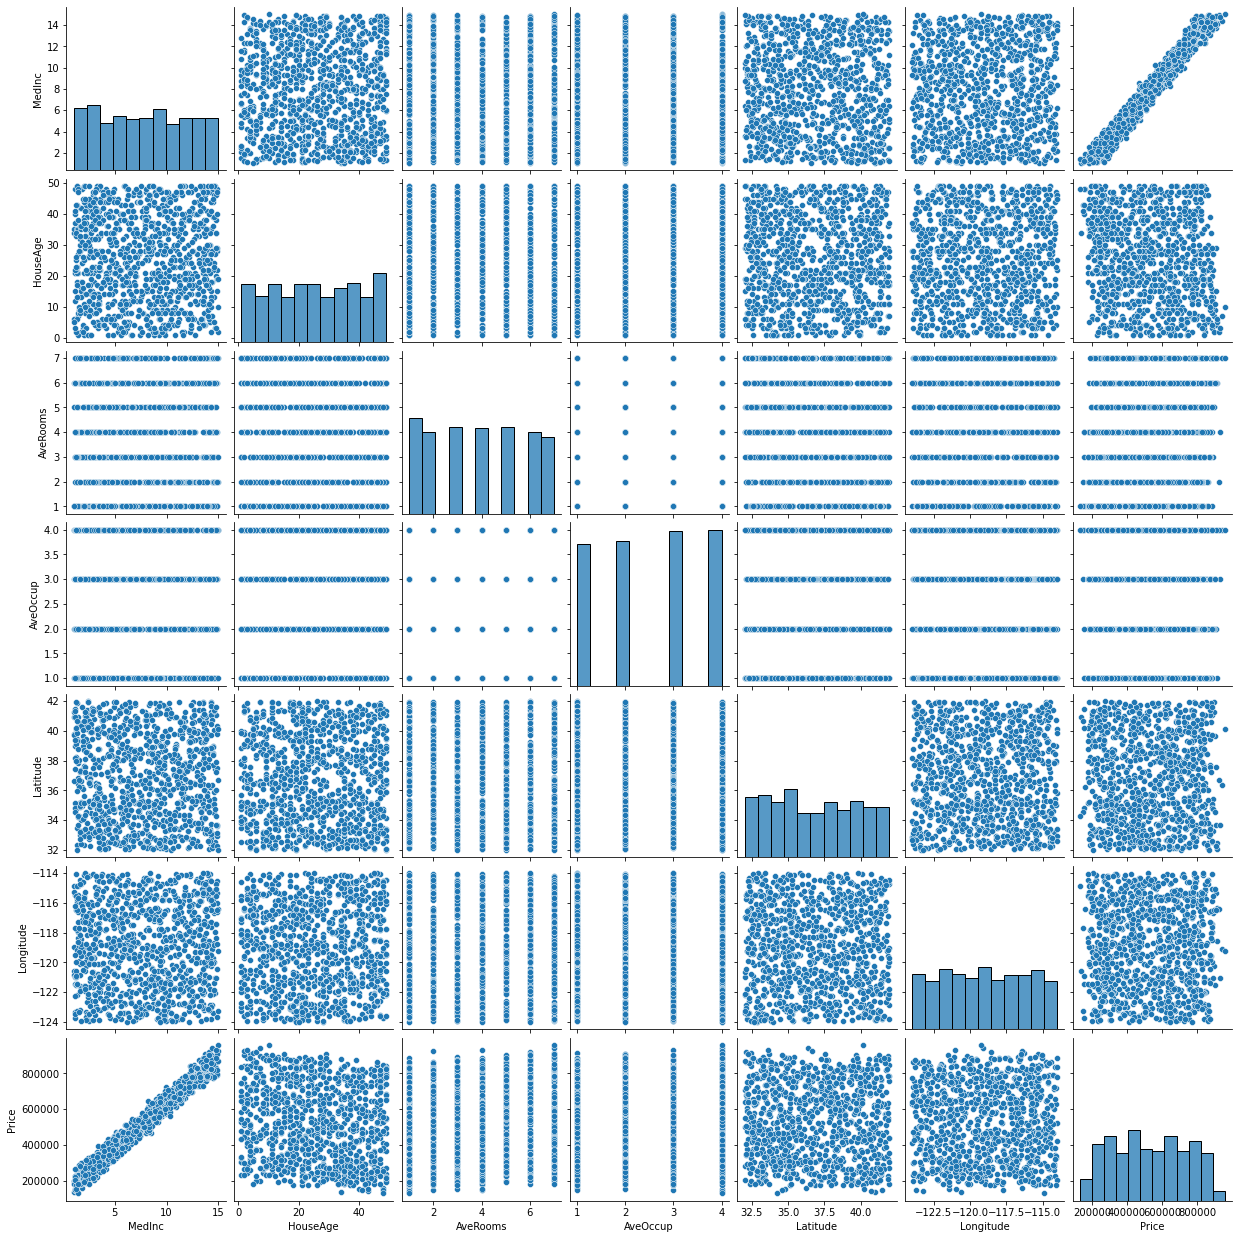

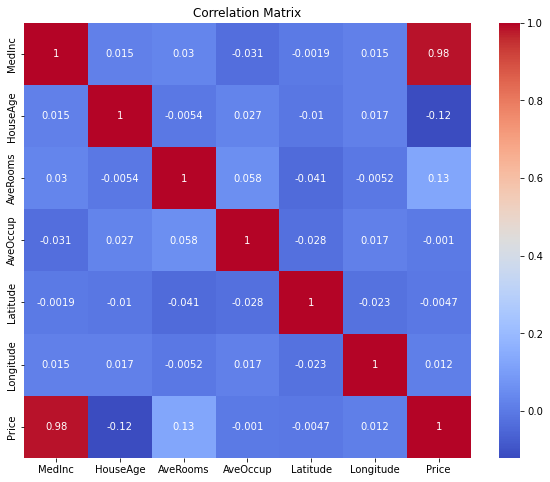

In [36]:
sns.pairplot(df)
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



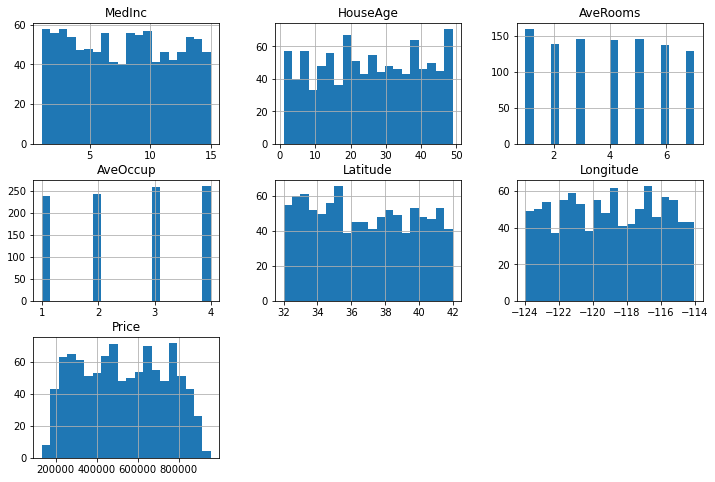

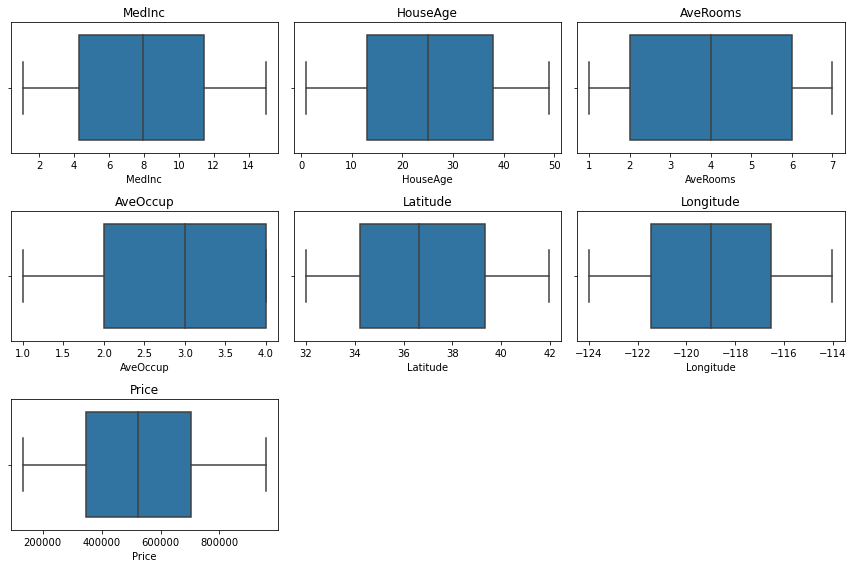

In [6]:
df.hist(figsize=(12, 8) , bins=20)
plt.show()

plt.figure(figsize= (12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [7]:
X= df[['MedInc']] #predictor
Y= df['Price']  #target

In [8]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y , test_size = 0.3 , random_state = 42)

In [9]:
simple_model = LinearRegression()
simple_model.fit(X_train , Y_train)

LinearRegression()

Mean Squared Error: 1184910531.5949445
R^2 Score: 0.9712455047572165


InvalidIndexError: (slice(None, None, None), None)

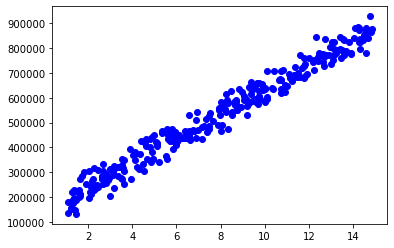

In [10]:
Y_pred = simple_model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}')
print(f'R^2 Score: {r2_score(Y_test, Y_pred)}')

plt.scatter(X_test, Y_test, color='blue', label = 'Actual Data')
plt.plot(X_test, Y_pred, color='red' , linewidth=2, label='Regression line')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend() 
plt.show()

Mean Squared Error: 1184910531.5949445
R^2 Score: 0.9712455047572165


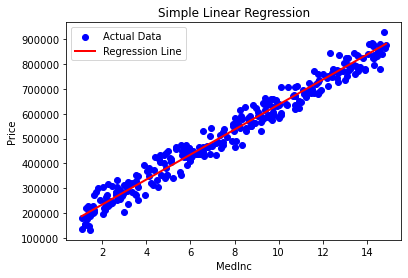

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Predict
Y_pred = simple_model.predict(X_test)

# Print metrics
print(f'Mean Squared Error: {mean_squared_error(Y_test, Y_pred)}')
print(f'R^2 Score: {r2_score(Y_test, Y_pred)}')

# Flatten X_test if it's a DataFrame with one column
X_test_flat = X_test.values.flatten()

# Sort X for line plot
sorted_idx = np.argsort(X_test_flat)
X_sorted = X_test_flat[sorted_idx]
Y_sorted = Y_pred[sorted_idx]

# Plot
plt.scatter(X_test_flat, Y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, Y_sorted, color='red', linewidth=2, label='Regression Line')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [12]:
medinc_value = float(input("Enter the MedInc value: "))
medinc_value_array = np.array([[medinc_value]])
predicted_price = simple_model.predict(medinc_value_array)
print(f"The predicted house price of {medinc_value} is: ${predicted_price[0]:.2f}")

Enter the MedInc value: 6
The predicted house price of 6.0 is: $435591.58


Multiple Regression model
